In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np
#import tensorflow as tf
#git lfs migrate import --include="*.csv"
#git lfs install
#git lfs pull

Esplorare i come sono cambiati nel tempo i tassi di matrimonio e divorzio
fluttuazioni annuali e come eventi sociali economici o culturali hanno influito
tecniche di analisi temporale per fare previsioni sul futuro

analizzare la correlazione tra matrimoni/divorzi e variabili sociodemografiche come età, livello di istruzione, reddito, occupazione e posizione geografica

condizioni economiche e dati demografici per cercare correlazioni

modello predittivo per matrimoni e divorzi , utilizzando i dati storici per prevedere i trend futiuri in base a vari fattori

1)
    1) Lettura file Matrimonio
    2) Suddivisione in due dataset
        1)Matrimonio Civile : df_civile
        2)Matrimonio Religioso : df_religioso
    3) Mostrare tramite plot la differenza di crescita tra gli anni 2009 e 2023 tra i due tipi
    4) Lettura di un nuovo file che indica l'età dello sposo e l'eta della sposa
    5) creazione di un nuovo dataset : Età_Matrimonio_df
    6) Creazione di uno scatter plot tridimensionale dove l'asse x e l'asse y sono l'età dello sposo e l'età della sposa mentra l'asse z sono gli anni. Per visualizzare i punti "caldi"

In [111]:
url = r".\File\DCIS_MATRDEMO_22012025231815369.csv"
matrimoni_df = pd.read_csv(url)

In [112]:
df_religioso = matrimoni_df.loc[matrimoni_df["Rito"] == "religioso", ["TIME", "Value", "Rito", "Territorio"]]
df_civile= matrimoni_df.loc[matrimoni_df["Rito"] == "civile", ["TIME", "Value", "Rito", "Territorio"]]
#divorzi_civile_df = divorzi_df.loc[divorzi_df["Rito di celebrazione del matrimonio"] == "rito civile",:]
#divorzi_religioso_df = divorzi_df.loc[divorzi_df["Rito di celebrazione del matrimonio"] == "rito religioso", :]

appoggio_df_religioso = df_religioso.groupby(by=["TIME"]).sum()
appoggio_df_civile = df_civile.groupby(by=["TIME"]).sum()

#calcolo la media annuale tra le varie regioni di matrimoni
appoggio_df_religioso["Media"] = df_religioso.loc[:,["TIME","Value"]].groupby(by="TIME").mean()
appoggio_df_civile["Media"] = df_civile.loc[:,["TIME","Value"]].groupby(by="TIME").mean()

#calcolo il valore mediano annuale tra le varie regioni
appoggio_df_religioso["Mediana"] = df_religioso.loc[:,["TIME","Value"]].groupby(by="TIME").median()
appoggio_df_civile["Mediana"] = df_civile.loc[:,["TIME","Value"]].groupby(by="TIME").median()

appoggio_df_religioso["Deviazione"] = df_religioso.loc[:,["TIME","Value"]].groupby(by="TIME").std()
appoggio_df_civile["Deviazione"] = df_civile.loc[:,["TIME","Value"]].groupby(by="TIME").std()

appoggio_df_religioso['Crescita %'] = appoggio_df_religioso["Value"].pct_change() * 100
appoggio_df_civile['Crescita %'] = appoggio_df_civile["Value"].pct_change() * 100

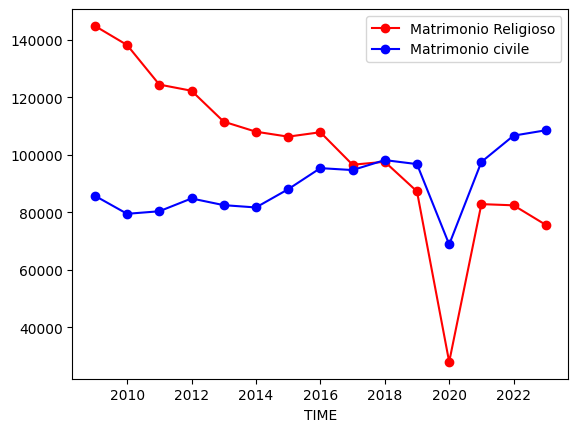

In [113]:
appoggio_df_religioso["Value"].plot(color="red", label="Matrimonio Religioso", legend=True, marker='o')
appoggio_df_civile["Value"].plot(color="blue", label="Matrimonio civile",legend=True, marker='o')
plt.show()

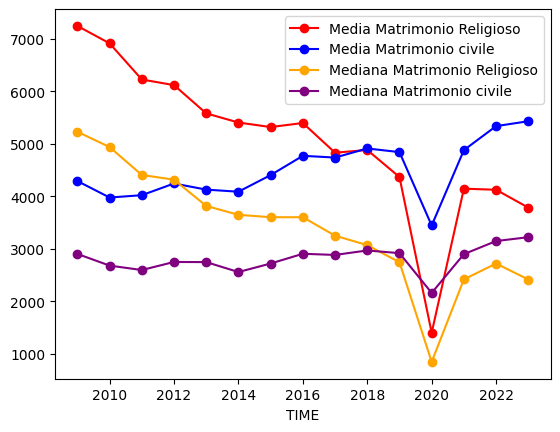

In [114]:
appoggio_df_religioso["Media"].plot(color="red", label="Media Matrimonio Religioso", legend=True, marker='o')
appoggio_df_civile["Media"].plot(color="blue", label="Media Matrimonio civile",legend=True, marker='o')
appoggio_df_religioso["Mediana"].plot(color="orange", label="Mediana Matrimonio Religioso", legend=True, marker='o')
appoggio_df_civile["Mediana"].plot(color="purple", label="Mediana Matrimonio civile",legend=True, marker='o')
plt.show()

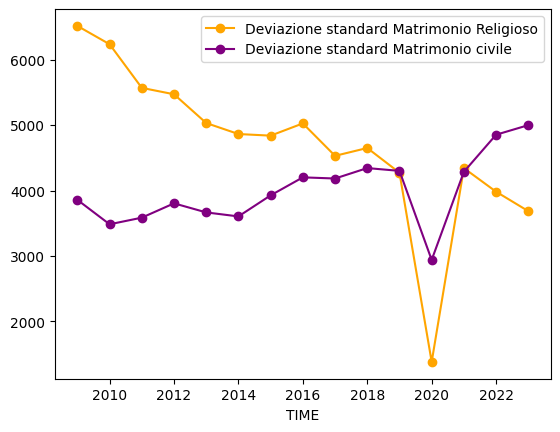

In [115]:
appoggio_df_religioso["Deviazione"].plot(color="orange", label="Deviazione standard Matrimonio Religioso", legend=True, marker='o')
appoggio_df_civile["Deviazione"].plot(color="purple", label="Deviazione standard Matrimonio civile",legend=True, marker='o')
plt.show()

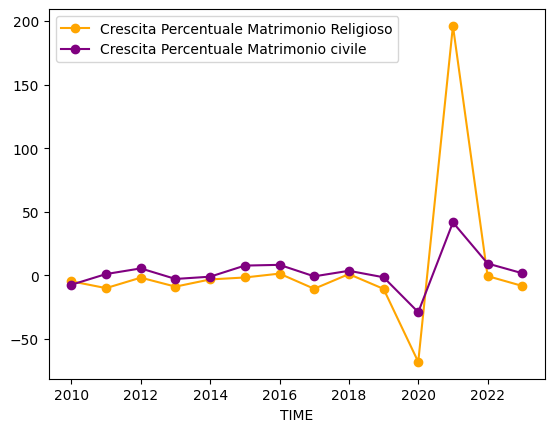

In [116]:
appoggio_df_religioso["Crescita %"].plot(color="orange", label="Crescita Percentuale Matrimonio Religioso", legend=True, marker='o')
appoggio_df_civile["Crescita %"].plot(color="purple", label="Crescita Percentuale Matrimonio civile",legend=True, marker='o')
plt.show()

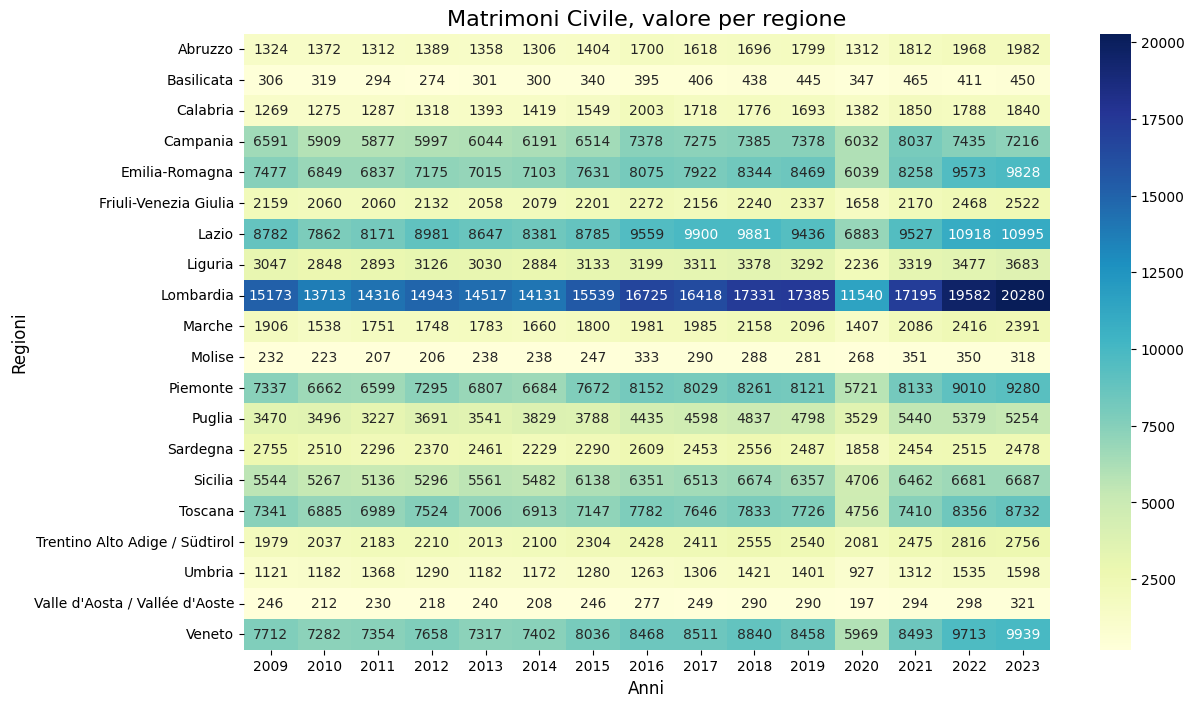

In [122]:


pivot_table = df_civile.pivot(index="Territorio", columns="TIME", values="Value")

# Creazione della heatmap
plt.figure(figsize=(13, 8))  # Dimensioni della figura
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Titolo e etichette
plt.title("Matrimoni Civile, valore per regione", fontsize=16)
plt.xlabel("Anni", fontsize=12)
plt.ylabel("Regioni", fontsize=12)

# Mostrare il grafico
plt.show()

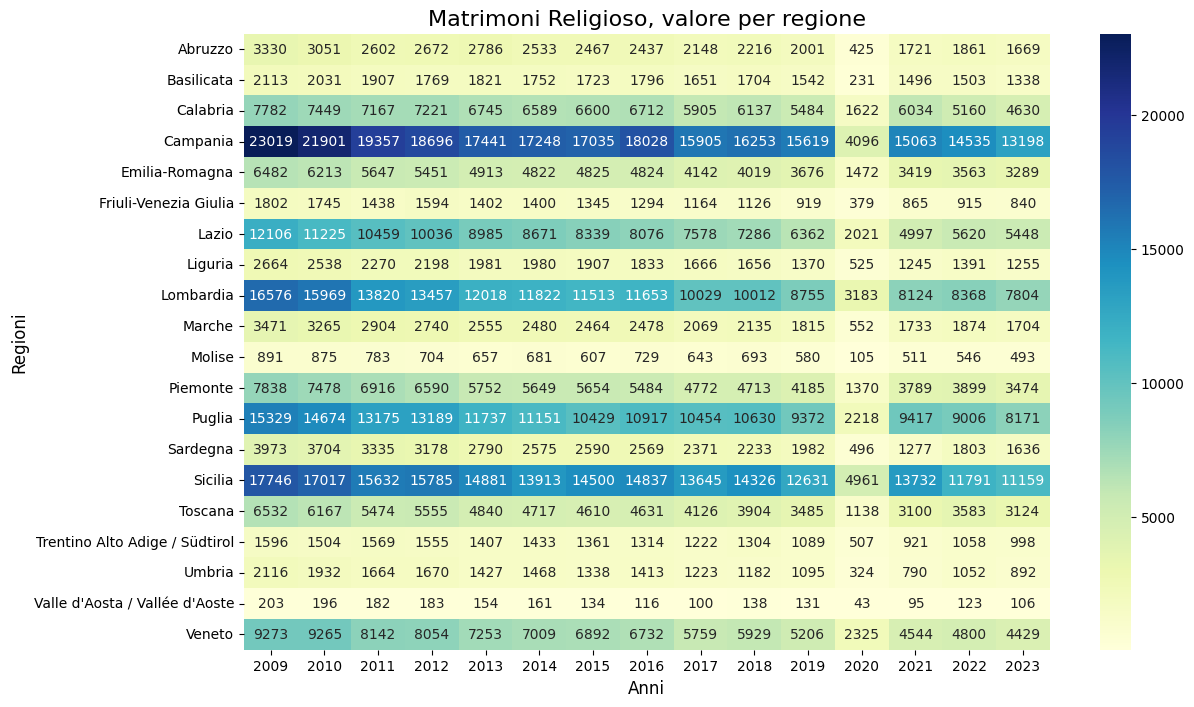

In [123]:
pivot_table = df_religioso.pivot(index="Territorio", columns="TIME", values="Value")

# Creazione della heatmap
plt.figure(figsize=(13, 8))  # Dimensioni della figura
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Titolo e etichette
plt.title("Matrimoni Religioso, valore per regione", fontsize=16)
plt.xlabel("Anni", fontsize=12)
plt.ylabel("Regioni", fontsize=12)

# Mostrare il grafico
plt.show()

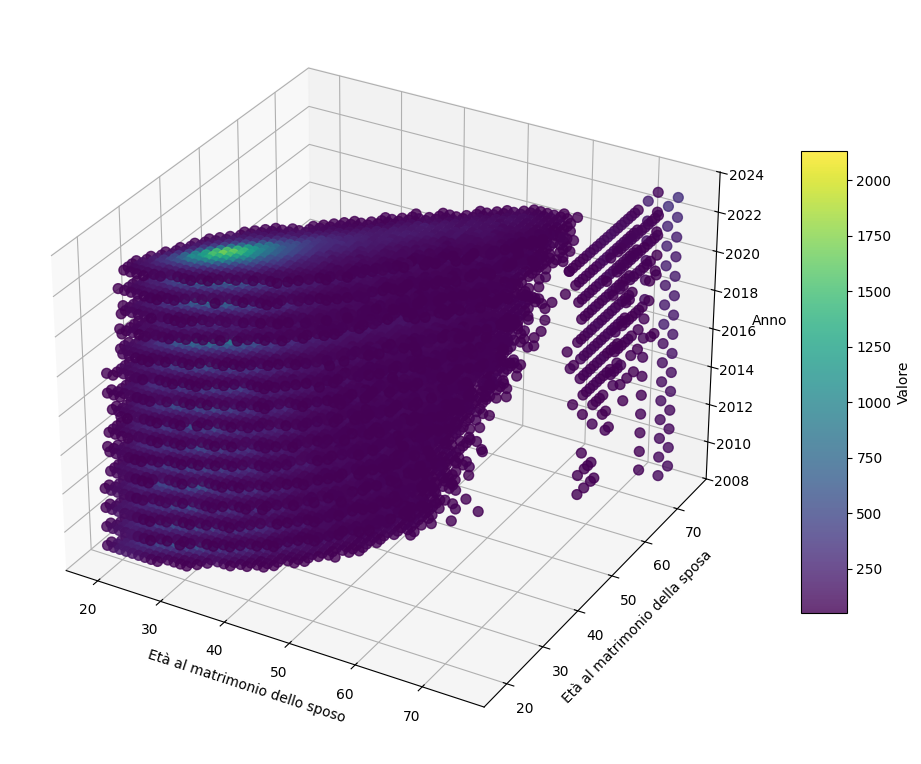

       TIME  Età dello sposo  Età della sposa  Value
11940  2009               30               28   2132
11956  2010               30               29   2049
11957  2011               30               29   1912
11958  2012               30               29   1895
11960  2014               30               29   1784
12799  2013               31               29   1726
11961  2015               30               29   1702
11963  2017               30               29   1669
11964  2018               30               29   1740
11947  2016               30               28   1720
11965  2019               30               29   1601
12806  2020               31               29    685
13678  2022               32               31   1766
12822  2021               31               30   1735
12824  2023               31               30   1689


In [128]:
UrlEtàMatrimonio = r".\File\DCIS_MATRDEMO_21012025135804046.csv"
Età_Matrimonio_df = pd.read_csv(UrlEtàMatrimonio)
Età_Matrimonio_df["Età al matrimonio dello sposo"] = Età_Matrimonio_df["Età al matrimonio dello sposo"].str.replace(" anni","").str.replace(" e più","").str.replace("70-74","72")
Età_Matrimonio_df["Età al matrimonio dello sposo"] = pd.to_numeric(Età_Matrimonio_df["Età al matrimonio dello sposo"], errors="coerce")
Età_Matrimonio_df["Età al matrimonio della sposa"] = Età_Matrimonio_df["Età al matrimonio della sposa"].str.replace(" anni","").str.replace(" e più","").str.replace("70-74","72")
Età_Matrimonio_df["Età al matrimonio della sposa"] = pd.to_numeric(Età_Matrimonio_df["Età al matrimonio della sposa"], errors="coerce")

Età_Matrimonio_df = Età_Matrimonio_df.loc[Età_Matrimonio_df["Value"] != 0, ["TIME", "Età al matrimonio dello sposo", "Età al matrimonio della sposa", "Value"]]
Età_Matrimonio_df = Età_Matrimonio_df.loc[Età_Matrimonio_df["Value"] > 50, ["TIME", "Età al matrimonio dello sposo", "Età al matrimonio della sposa", "Value"]]

maggior_numero_di_matrimoni = pd.DataFrame()

for year in Età_Matrimonio_df["TIME"].unique():
    valore = Età_Matrimonio_df.loc[Età_Matrimonio_df["TIME"] == year, ["Value"]].max()
    Appoggio = Età_Matrimonio_df.loc[Età_Matrimonio_df["Value"] == valore["Value"],["TIME", "Età al matrimonio dello sposo", "Età al matrimonio della sposa", "Value"]]
    maggior_numero_di_matrimoni = pd.concat([maggior_numero_di_matrimoni,Appoggio.loc[Appoggio["TIME"] == year, ["TIME", "Età al matrimonio dello sposo", "Età al matrimonio della sposa", "Value"]]])

maggior_numero_di_matrimoni = maggior_numero_di_matrimoni.rename(columns={"Età al matrimonio dello sposo":"Età dello sposo", "Età al matrimonio della sposa":"Età della sposa"})
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection="3d")
scatterplot = ax.scatter(Età_Matrimonio_df["Età al matrimonio dello sposo"], Età_Matrimonio_df["Età al matrimonio della sposa"], Età_Matrimonio_df["TIME"], c= Età_Matrimonio_df["Value"], cmap="viridis", s=50, alpha=0.8)
ax.set_xlabel('Età al matrimonio dello sposo')
ax.set_ylabel('Età al matrimonio della sposa')
ax.set_zlabel('Anno')

cbar = plt.colorbar(scatterplot, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Valore')

# Mostra il grafico
plt.show() 

print(maggior_numero_di_matrimoni)

1) Fine 1)

2)
    1) Lettura di due file: separazioni e divorzi
    2) Creazione del dataset divorzi_df
    3) Suddivisione dei divorzi tra divorzi da matrimoni civili e matrimoni religiosi
        1) Divorzi da Matrimonio Civile: divorzi_civile_df
        2) Divorzi da Matrimonio Religioso: divorzi_religioso_df
    4) Mostrare tramite plot la differenza di crescita tra gli anni 2015 e 2021 tra i due tipi
    4) Lettura di un nuovo file che indica l'età del marito e l'eta della moglie alla separazione
    5) creazione di un nuovo dataset : Età_Divorzio_df
    6) Creazione di uno scatter plot tridimensionale dove l'asse x e l'asse y sono l'età del marito e l'età della moglie mentra l'asse z sono gli anni. Per visualizzare i punti "caldi"

In [77]:
url = r".\File\DCIS_DIVFIG1_19012025170213975.csv"
divorzi_df = pd.read_csv(url)
divorzi_df.columns

Index(['ITTER107', 'Territorio', 'TIPO_DATO15', 'Tipo dato', 'ESAURIMENTO_A',
       'Rito di esaurimento', 'ESAURIMENTO_B',
       'Rito di celebrazione del matrimonio', 'TIME', 'Seleziona periodo',
       'Value', 'Flag Codes', 'Flags'],
      dtype='object')

<Axes: xlabel='TIME'>

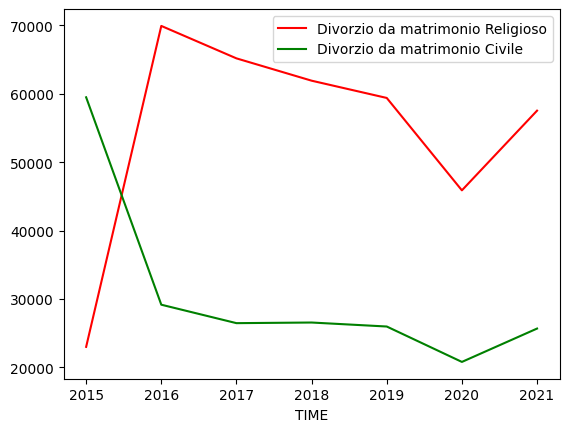

In [140]:
divorzi_civile_df = divorzi_df.loc[divorzi_df["Rito di celebrazione del matrimonio"] == "rito civile",:]
divorzi_religioso_df = divorzi_df.loc[divorzi_df["Rito di celebrazione del matrimonio"] == "rito religioso", :]
appoggio_divorzi_civile_df = divorzi_civile_df.loc[:, ["TIME", "Value", "Rito di celebrazione del matrimonio"]].groupby(by=["TIME"]).sum()
appoggio_divorzi_religioso_df = divorzi_religioso_df.loc[:, ["TIME", "Value", "Rito di celebrazione del matrimonio"]].groupby(by=["TIME"]).sum()

#calcolo la media annuale tra le varie regioni di matrimoni
appoggio_divorzi_religioso_df["Media"] = divorzi_religioso_df.loc[:,["TIME","Value"]].groupby(by="TIME").mean()
appoggio_divorzi_civile_df["Media"] = divorzi_civile_df.loc[:,["TIME","Value"]].groupby(by="TIME").mean()

#calcolo il valore mediano annuale tra le varie regioni
appoggio_divorzi_religioso_df["Mediana"] = divorzi_religioso_df.loc[:,["TIME","Value"]].groupby(by="TIME").median()
appoggio_divorzi_civile_df["Mediana"] = divorzi_civile_df.loc[:,["TIME","Value"]].groupby(by="TIME").median()

appoggio_divorzi_religioso_df["Deviazione"] = divorzi_religioso_df.loc[:,["TIME","Value"]].groupby(by="TIME").std()
appoggio_divorzi_civile_df["Deviazione"] = divorzi_civile_df.loc[:,["TIME","Value"]].groupby(by="TIME").std()

appoggio_divorzi_religioso_df['Crescita %'] = appoggio_divorzi_civile_df["Value"].pct_change() * 100
appoggio_divorzi_civile_df['Crescita %'] = appoggio_divorzi_religioso_df["Value"].pct_change() * 100



appoggio_divorzi_religioso_df["Value"].plot(color="red", label="Divorzio da matrimonio Religioso", legend=True)
appoggio_divorzi_civile_df["Value"].plot(color="green", label="Divorzio da matrimonio Civile", legend=True)

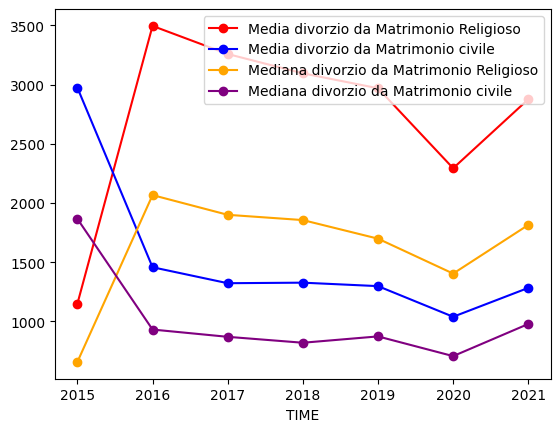

In [86]:
appoggio_divorzi_religioso_df["Media"].plot(color="red", label="Media divorzio da Matrimonio Religioso", legend=True, marker='o')
appoggio_divorzi_civile_df["Media"].plot(color="blue", label="Media divorzio da Matrimonio civile",legend=True, marker='o')
appoggio_divorzi_religioso_df["Mediana"].plot(color="orange", label="Mediana divorzio da Matrimonio Religioso", legend=True, marker='o')
appoggio_divorzi_civile_df["Mediana"].plot(color="purple", label="Mediana divorzio da Matrimonio civile",legend=True, marker='o')
plt.show()

Deviazione standard - Civile: 12986.744546065494
Deviazione standard - Religioso: 15846.636913748938
Coefficiente di variazione - Civile: 42.47%
Coefficiente di variazione - Religioso: 28.98%


<Figure size 800x500 with 0 Axes>

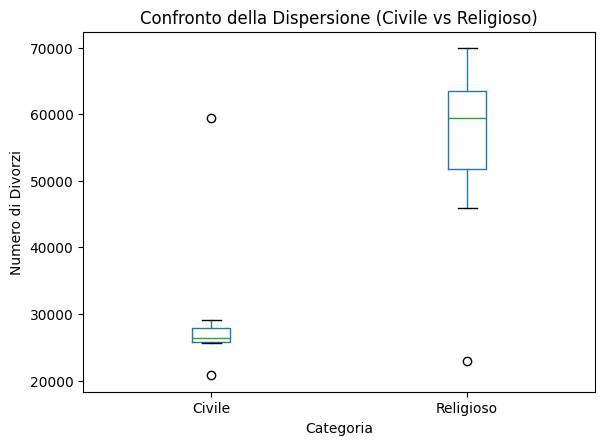

In [143]:
std_divorzi_civile = appoggio_divorzi_civile_df["Value"].std()
std_divorzi_religioso = appoggio_divorzi_religioso_df["Value"].std()

print(f"Deviazione standard - Civile: {std_divorzi_civile}")
print(f"Deviazione standard - Religioso: {std_divorzi_religioso}")

mean_divorzi_civile = appoggio_divorzi_civile_df["Value"].mean()
mean_divorzi_religioso = appoggio_divorzi_religioso_df["Value"].mean()

# Calcolo del CV
cv_divorzi_civile = (std_divorzi_civile / mean_divorzi_civile) * 100
cv_divorzi_religioso = (std_divorzi_religioso / mean_divorzi_religioso) * 100

print(f"Coefficiente di variazione - Civile: {cv_divorzi_civile:.2f}%")
print(f"Coefficiente di variazione - Religioso: {cv_divorzi_religioso:.2f}%")

appoggio_divorzi_religioso_df = appoggio_divorzi_religioso_df.reset_index()
appoggio_divorzi_civile_df = appoggio_divorzi_civile_df.reset_index()
import matplotlib.pyplot as plt

# Creazione di un unico DataFrame per il grafico
df_combined = pd.DataFrame({
    "Anno": appoggio_divorzi_civile_df["TIME"].tolist() + appoggio_divorzi_religioso_df["TIME"].tolist(),
    "Divorzi": appoggio_divorzi_civile_df["Value"].tolist() + appoggio_divorzi_religioso_df["Value"].tolist(),
    "Categoria": ["Civile"] * len(appoggio_divorzi_civile_df) + ["Religioso"] * len(appoggio_divorzi_religioso_df)
})

# Creazione del boxplot
plt.figure(figsize=(8, 5))
df_combined.boxplot(by="Categoria", column="Divorzi", grid=False)
plt.title("Confronto della Dispersione (Civile vs Religioso)")
plt.suptitle("")  # Rimuove il titolo automatico del boxplot
plt.xlabel("Categoria")
plt.ylabel("Numero di Divorzi")
plt.show()

Value    6392
dtype: int64
Value    7585
dtype: int64
Value    7520
dtype: int64
Value    8022
dtype: int64
Value    7976
dtype: int64
Value    6701
dtype: int64
Value    8715
dtype: int64


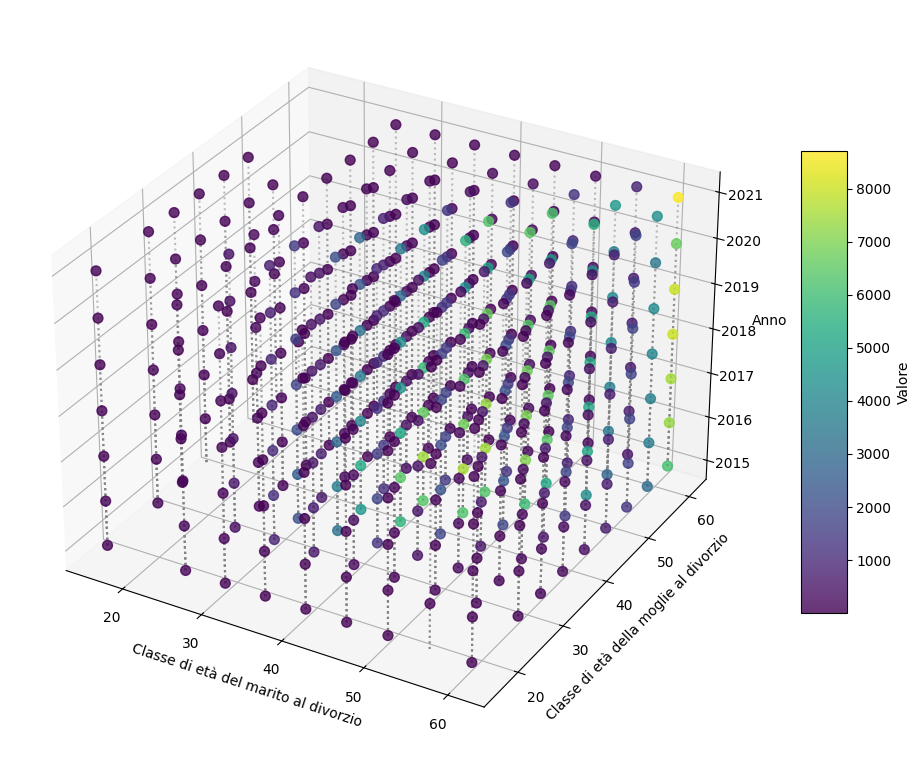

     TIME  Età del Marito  Età della moglie  Value
280  2015              41                41   6392
344  2016              46                41   7585
562  2017              61                61   7520
563  2018              61                61   8022
564  2019              61                61   7976
565  2020              61                61   6701
566  2021              61                61   8715


In [74]:
UrlEtàDivorzio = r".\File\DCIS_DIVORDEMCONG1_21012025160323899.csv"
Età_Divorzio_df = pd.read_csv(UrlEtàDivorzio)
Età_Divorzio_df["Classe di età del marito al divorzio"] = Età_Divorzio_df["Classe di età del marito al divorzio"].str.replace(" anni","").str.replace(" e più","").str.split("-").str[0]
Età_Divorzio_df["Classe di età del marito al divorzio"] = pd.to_numeric(Età_Divorzio_df["Classe di età del marito al divorzio"], errors="coerce")+1
Età_Divorzio_df["Classe di età della moglie al divorzio"] = Età_Divorzio_df["Classe di età della moglie al divorzio"].str.replace(" anni","").str.replace(" e più","").str.split("-").str[0]
Età_Divorzio_df["Classe di età della moglie al divorzio"] = pd.to_numeric(Età_Divorzio_df["Classe di età della moglie al divorzio"], errors="coerce")+1
Età_Divorzio_df = Età_Divorzio_df.loc[Età_Divorzio_df["Value"]>0, ["TIME", "Classe di età del marito al divorzio", "Classe di età della moglie al divorzio", "Value"]]

maggior_numero_di_divorzi = pd.DataFrame()

for year in Età_Divorzio_df["TIME"].unique():
    valore = Età_Divorzio_df.loc[Età_Divorzio_df["TIME"] == year, ["Value"]].max()
    Appoggio = Età_Divorzio_df.loc[Età_Divorzio_df["Value"] == valore["Value"],["TIME", "Classe di età del marito al divorzio", "Classe di età della moglie al divorzio", "Value"]]
    maggior_numero_di_divorzi = pd.concat([maggior_numero_di_divorzi,Appoggio.loc[Appoggio["TIME"] == year, ["TIME", "Classe di età del marito al divorzio", "Classe di età della moglie al divorzio", "Value"]]])

maggior_numero_di_divorzi = maggior_numero_di_divorzi.rename(columns={"Classe di età del marito al divorzio":"Età del Marito","Classe di età della moglie al divorzio":"Età della moglie"})


fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111,projection="3d")

scatterplot = ax.scatter(Età_Divorzio_df["Classe di età del marito al divorzio"], Età_Divorzio_df["Classe di età della moglie al divorzio"], Età_Divorzio_df["TIME"], c= Età_Divorzio_df["Value"], cmap="viridis", s=50, alpha=0.8)
Età_Divorzio_df = Età_Divorzio_df.reset_index()
for i in range(len(Età_Divorzio_df)):
    ax.plot(
        [Età_Divorzio_df['Classe di età del marito al divorzio'][i], Età_Divorzio_df['Classe di età del marito al divorzio'][i]],  # Asse X
        [Età_Divorzio_df['Classe di età della moglie al divorzio'][i], Età_Divorzio_df['Classe di età della moglie al divorzio'][i]],  # Asse Y
        [Età_Divorzio_df['TIME'][0], Età_Divorzio_df['TIME'][i]],  # Linea verticale verso il piano XY
        color='gray', alpha=0.5, linestyle='dotted'
    )

ax.set_xlabel('Classe di età del marito al divorzio')
ax.set_ylabel('Classe di età della moglie al divorzio')
ax.set_zlabel('Anno')

cbar = plt.colorbar(scatterplot, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Valore')

# Mostra il grafico
plt.show() 

print(maggior_numero_di_divorzi)


2) Fine 2)

3)
    1) Creazione di una tabella_pivot derivante dal dataset divorzi_civile_df
    2) Mostrare tramite plot heatmap i valori del divorzio da matrimonio civile nelle singole regioni tra il 2015-2021

    1.1) Creazione di una tabella_pivot derivante dal dataset divorzi_religioso_df
    2.1) Mostrare tramite plot heatmap i valori del divorzio da matrimonio religioso nelle singole regioni tra il 2015-2021

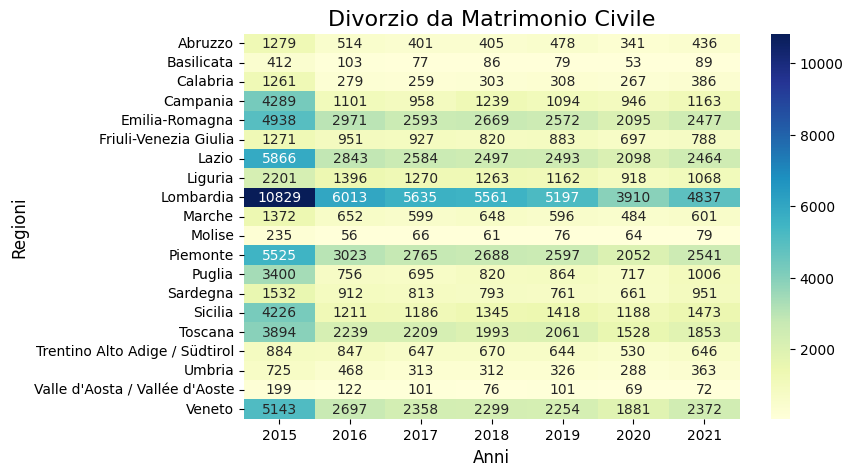

In [215]:


pivot_table = divorzi_civile_df.pivot(index="Territorio", columns="TIME", values="Value")

# Creazione della heatmap
plt.figure(figsize=(8, 5))  # Dimensioni della figura
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Titolo e etichette
plt.title("Divorzio da Matrimonio Civile", fontsize=16)
plt.xlabel("Anni", fontsize=12)
plt.ylabel("Regioni", fontsize=12)

# Mostrare il grafico
plt.show()

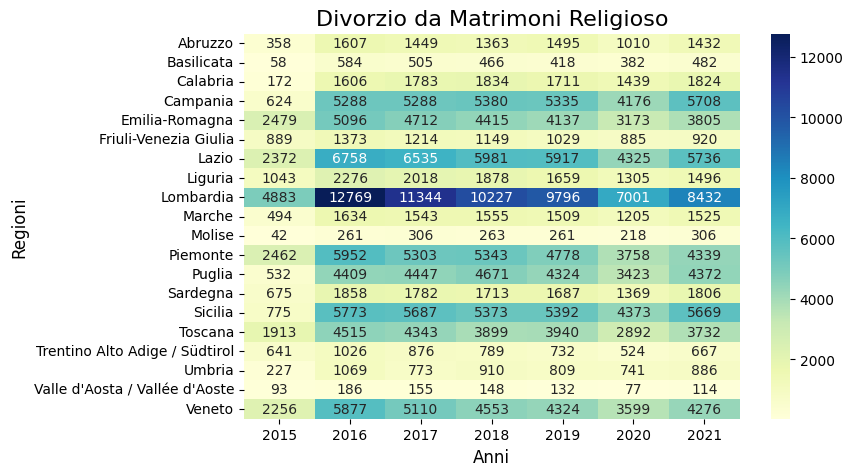

In [220]:


pivot_table = divorzi_religioso_df.pivot(index="Territorio", columns="TIME", values="Value")

# Creazione della heatmap
plt.figure(figsize=(8, 5))  # Dimensioni della figura
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Titolo e etichette
plt.title("Divorzio da Matrimoni Religioso", fontsize=16)
plt.xlabel("Anni", fontsize=12)
plt.ylabel("Regioni", fontsize=12)

# Mostrare il grafico
plt.show()

3) Fine 3)

?????? Distribuzione del divorzio da matrimonio civile e matrimonio religioso per regione mostrando la mappa dell' Italia??????

In [223]:
Mostra = False
if Mostra == True:
    url_shp = r".\File\Reg01012024_g_WGS84.shp"
    for time in divorzi_civile_df["TIME"].unique():
        df_civile2023 = divorzi_civile_df.loc[divorzi_civile_df["TIME"] == time, ["TIME", "Value","Rito di celebrazione del matrimonio", "Territorio"]]
        df_religioso2023 = divorzi_religioso_df.loc[divorzi_religioso_df["TIME"] == time, ["TIME", "Value","Rito di celebrazione del matrimonio", "Territorio"]]
        df_region= gpd.read_file(filename=url_shp)
        df_region.loc[df_region["DEN_REG"]=="Valle d'Aosta", "DEN_REG"] = "Valle d'Aosta / Vallée d'Aoste"
        df_region.loc[df_region["DEN_REG"]=="Trentino-Alto Adige", "DEN_REG"] = "Trentino Alto Adige / Südtirol"
        df_religioso2023= df_religioso2023.merge(df_region, left_on="Territorio", right_on="DEN_REG", how="inner")
        df_civile2023= df_civile2023.merge(df_region, left_on="Territorio", right_on="DEN_REG", how="inner")
        fig,ax=plt.subplots(1,1)
        fig1,ax1=plt.subplots(1,1)
        gdf_region1 = gpd.GeoDataFrame(df_religioso2023, geometry="geometry")           #mostrare un'immagine utilizzando la mappa
        gdf_region2 = gpd.GeoDataFrame(df_civile2023, geometry="geometry") 
        gdf_region1.plot(column="Value", cmap="OrRd", linewidth=0.8,ax=ax, edgecolor="0.8",legend=True).set_title(f"Divorzio da matrimonio Religioso {time}")
        gdf_region2.plot(column="Value", cmap="OrRd", linewidth=0.8,ax=ax1, edgecolor="0.8",legend=True).set_title(f"Divorzio da matrimonio Civile {time}")

In [224]:
Mostra = False
if Mostra == True:
    url_shp = r".\File\Reg01012024_g_WGS84.shp"
    for time in df_religioso["TIME"].unique():
        df_religioso2023 = df_religioso.loc[df_religioso["TIME"] == time, ["TIME", "Value","Rito", "Territorio"]]
        df_civile2023 = df_civile.loc[df_civile["TIME"] == time, ["TIME", "Value","Rito", "Territorio"]]
        df_region= gpd.read_file(filename=url_shp)
        df_region.loc[df_region["DEN_REG"]=="Valle d'Aosta", "DEN_REG"] = "Valle d'Aosta / Vallée d'Aoste"
        df_region.loc[df_region["DEN_REG"]=="Trentino-Alto Adige", "DEN_REG"] = "Trentino Alto Adige / Südtirol"
        df_religioso2023= df_religioso2023.merge(df_region, left_on="Territorio", right_on="DEN_REG", how="inner")
        df_civile2023= df_civile2023.merge(df_region, left_on="Territorio", right_on="DEN_REG", how="inner")
        #gdf = gpd.GeoDataFrame(df_population, geometry="geometry")
        fig,ax=plt.subplots(1,1)
        fig1,ax1=plt.subplots(1,1)
        gdf_region1 = gpd.GeoDataFrame(df_religioso2023, geometry="geometry")           #mostrare un'immagine utilizzando la mappa
        gdf_region2 = gpd.GeoDataFrame(df_civile2023, geometry="geometry") 
        gdf_region1.plot(column="Value", cmap="OrRd", linewidth=0.8,ax=ax, edgecolor="0.8",legend=True).set_title(f"Matrimonio Religioso {time}")
        gdf_region2.plot(column="Value", cmap="OrRd", linewidth=0.8,ax=ax1, edgecolor="0.8",legend=True).set_title(f"Matrimonio Civile {time}")

Fine ?????? Fine ?????? Fine

In [144]:
#df_religioso2023.merge(df_region, left_on="Territorio", right_on="DEN_REG", how="inner")

divorzi_civile_df = divorzi_civile_df.rename(columns={"Value": "Value Divorzi Civili"})
divorzi_religioso_df = divorzi_religioso_df.rename(columns={"Value": "Value Divorzi Religiosi"})
df_civile = df_civile.rename(columns={"Value": "Value Matrimoni Civili"})
df_religioso = df_religioso.rename(columns={"Value": "Value Matrimoni Religiosi"})

divorzi_tot_df = divorzi_civile_df.merge(divorzi_religioso_df, left_on=["TIME","Territorio"], right_on=["TIME","Territorio"], how="inner")
divorzi_tot_df = divorzi_tot_df.loc[:, ["TIME", "Value Divorzi Civili", "Value Divorzi Religiosi"]].groupby(by="TIME").sum()
matrimoni_tot_df = df_civile.merge(df_religioso, left_on=["TIME","Territorio"], right_on=["TIME","Territorio"], how="inner")
matrimoni_tot_df = matrimoni_tot_df.loc[:, ["TIME", "Value Matrimoni Civili", "Value Matrimoni Religiosi"]].groupby(by="TIME").sum()

matrimoni_divorzi_df = matrimoni_tot_df.merge(divorzi_tot_df, left_on=["TIME"], right_on=["TIME"], how="outer").reset_index()
#data = pd.read_csv('matrimoni_divorzi.csv')  # Sostituisci con il nome del file
print(matrimoni_divorzi_df.head())
print(matrimoni_divorzi_df.info())
print(matrimoni_divorzi_df.describe())
print(matrimoni_divorzi_df.isnull().sum())

   TIME  Value Matrimoni Civili  Value Matrimoni Religiosi  \
0  2009                   85771                     144842   
1  2010                   79501                     138199   
2  2011                   80387                     124443   
3  2012                   84841                     122297   
4  2013                   82512                     111545   

   Value Divorzi Civili  Value Divorzi Religiosi  
0                   NaN                      NaN  
1                   NaN                      NaN  
2                   NaN                      NaN  
3                   NaN                      NaN  
4                   NaN                      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TIME                       15 non-null     int64  
 1   Value Matrimoni Civili     15 non-null     int

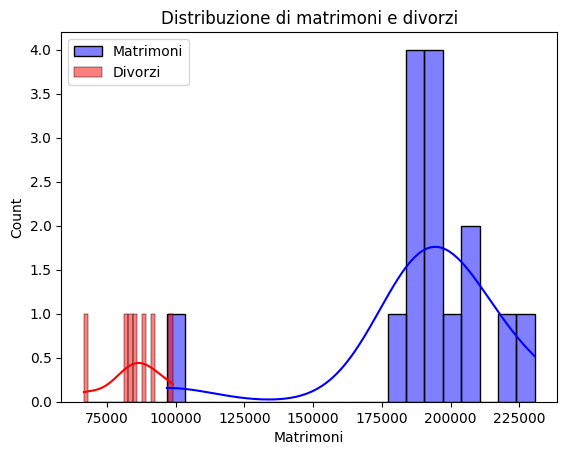

In [145]:
somma = matrimoni_divorzi_df
somma["Matrimoni"] = somma['Value Matrimoni Religiosi'] + somma["Value Matrimoni Civili"]
somma["Divorzi"] = somma['Value Divorzi Religiosi']+somma["Value Divorzi Civili"]
sns.histplot(somma['Matrimoni'], kde=True, bins=20, color='blue', label='Matrimoni')
sns.histplot(somma["Divorzi"], kde=True, bins=20, color='red', label='Divorzi')
plt.legend()
plt.title("Distribuzione di matrimoni e divorzi")
plt.show()

Index(['IT107', 'Territorio', 'T_D8', 'Tipo dato', 'PRAF',
       'Presenza affitti imputati', 'RDPR',
       'Fonte principale di reddito familiare ', 'TIME', 'Seleziona periodo',
       'Value', 'Flag Codes', 'Flags'],
      dtype='object')


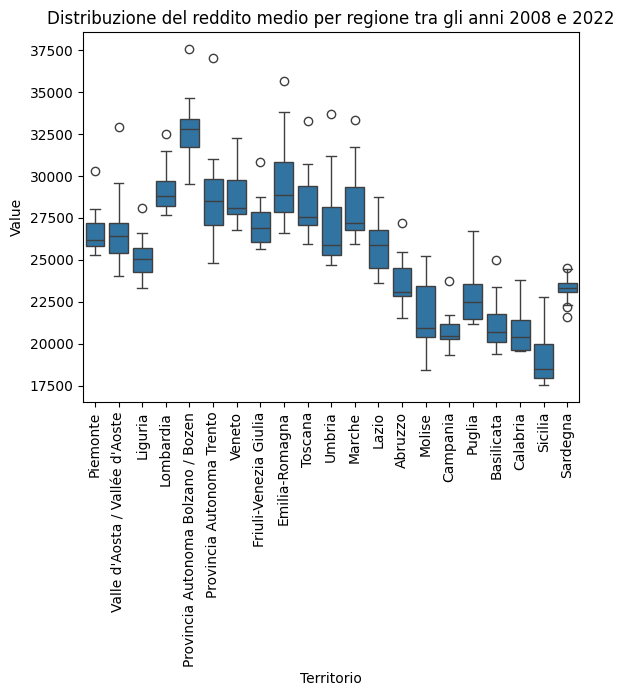

In [148]:
UrlReddito = r".\File\DCCV_REDNETFAMFONTERED_20012025232759116.csv"
reddito_df = pd.read_csv(UrlReddito)
print(reddito_df.columns)
sns.boxplot(x='Territorio', y='Value', data=reddito_df)
plt.xticks(rotation=90)
plt.title("Distribuzione del reddito medio per regione tra gli anni 2008 e 2022")
plt.show()

In [206]:
new_matrimoni_df = matrimoni_df.loc[:, ["TIME", "Territorio", "Value"]]
new_matrimoni_df = new_matrimoni_df.rename(columns={"Value":"Value Divorzi"})
new_divorzi_df = divorzi_df.loc[:, ["TIME", "Territorio", "Value"]]
new_divorzi_df = new_divorzi_df.rename(columns={"Value":"Value Reddito"})
df_matrimoni_divorzi = pd.merge(new_matrimoni_df, new_divorzi_df, on=["TIME", "Territorio"])

correlazione = df_matrimoni_divorzi["Value Divorzi"].corr(df_matrimoni_divorzi["Value Reddito"])

corr_per_anno = df_matrimoni_divorzi.groupby("TIME").apply(
    lambda x: x["Value Divorzi"].corr(x["Value Reddito"])
)
print(corr_per_anno)

corr_per_territorio = df_matrimoni_divorzi.groupby("Territorio").apply(
    lambda x: x["Value Divorzi"].corr(x["Value Reddito"])
)
print(corr_per_territorio)


TIME
2015    0.636255
2016    0.660810
2017    0.675378
2018    0.690420
2019    0.691260
2020    0.662413
2021    0.684935
dtype: float64
Territorio
Abruzzo                           0.142230
Basilicata                        0.050645
Calabria                          0.018209
Campania                          0.046079
Emilia-Romagna                    0.140248
Friuli-Venezia Giulia             0.213666
Lazio                             0.161462
Liguria                           0.181048
Lombardia                         0.184095
Marche                            0.141087
Molise                            0.042471
Piemonte                          0.162968
Puglia                            0.054223
Sardegna                          0.117620
Sicilia                           0.039180
Toscana                           0.153586
Trentino Alto Adige / Südtirol    0.185430
Umbria                            0.084834
Valle d'Aosta / Vallée d'Aoste    0.123510
Veneto                           

C:\Users\leona\AppData\Local\Temp\ipykernel_23856\1866112110.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_per_anno = df_matrimoni_divorzi.groupby("TIME").apply(
C:\Users\leona\AppData\Local\Temp\ipykernel_23856\1866112110.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_per_territorio = df_matrimoni_divorzi.groupby("Territorio").apply(


In [207]:
new_matrimoni_df = matrimoni_df.loc[:, ["TIME", "Territorio", "Value"]]
new_matrimoni_df = new_matrimoni_df.rename(columns={"Value":"Value Divorzi"})
new_reddito_df = reddito_df.loc[:, ["TIME", "Territorio", "Value"]]
new_reddito_df = new_reddito_df.rename(columns={"Value":"Value Reddito"})
df_reddito_matrimoni = pd.merge(new_matrimoni_df, new_reddito_df, on=["TIME", "Territorio"])

correlazione = df_reddito_matrimoni["Value Divorzi"].corr(df_reddito_matrimoni["Value Reddito"])

corr_per_anno = df_reddito_matrimoni.groupby("TIME").apply(
    lambda x: x["Value Divorzi"].corr(x["Value Reddito"])
)
print(corr_per_anno)

corr_per_territorio = df_reddito_matrimoni.groupby("Territorio").apply(
    lambda x: x["Value Divorzi"].corr(x["Value Reddito"])
)
print(corr_per_territorio)


TIME
2009    0.051018
2010    0.035221
2011    0.018784
2012    0.007398
2013    0.065326
2014    0.056921
2015   -0.012747
2016    0.040351
2017   -0.011807
2018   -0.001243
2019    0.012072
2020    0.120113
2021   -0.055476
2022    0.033293
dtype: float64
Territorio
Abruzzo                          -0.013799
Basilicata                       -0.113684
Calabria                         -0.235459
Campania                         -0.079495
Emilia-Romagna                   -0.075773
Friuli-Venezia Giulia            -0.195979
Lazio                            -0.186101
Liguria                          -0.185881
Lombardia                        -0.169340
Marche                           -0.302485
Molise                           -0.097881
Piemonte                         -0.149487
Puglia                           -0.101824
Sardegna                         -0.384946
Sicilia                          -0.170731
Toscana                          -0.255066
Umbria                           -0.342541


C:\Users\leona\AppData\Local\Temp\ipykernel_23856\1317152661.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_per_anno = df_reddito_matrimoni.groupby("TIME").apply(
C:\Users\leona\AppData\Local\Temp\ipykernel_23856\1317152661.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_per_territorio = df_reddito_matrimoni.groupby("Territorio").apply(


In [208]:
new_divorzi_df = divorzi_df.loc[:, ["TIME", "Territorio", "Value"]]
new_divorzi_df = new_divorzi_df.rename(columns={"Value":"Value Divorzi"})
new_reddito_df = reddito_df.loc[:, ["TIME", "Territorio", "Value"]]
new_reddito_df = new_reddito_df.rename(columns={"Value":"Value Reddito"})
df_reddito_divorzi = pd.merge(new_divorzi_df, new_reddito_df, on=["TIME", "Territorio"])
#print(df_reddito_divorzi)

correlazione = df_reddito_divorzi["Value Divorzi"].corr(df_reddito_divorzi["Value Reddito"])
#print(f"Coefficiente di correlazione: {correlazione}")

corr_per_anno = df_reddito_divorzi.groupby("TIME").apply(
    lambda x: x["Value Divorzi"].corr(x["Value Reddito"])
)
print(corr_per_anno)

corr_per_territorio = df_reddito_divorzi.groupby("Territorio").apply(
    lambda x: x["Value Divorzi"].corr(x["Value Reddito"])
)
print(corr_per_territorio)

#Non è presente una correlazione diretta tra reddito medio e divorzio

TIME
2015    0.344138
2016    0.341359
2017    0.276008
2018    0.261949
2019    0.249175
2020    0.240084
2021    0.160816
dtype: float64
Territorio
Abruzzo                           0.084961
Basilicata                       -0.065215
Calabria                          0.033029
Campania                          0.066593
Emilia-Romagna                   -0.227806
Friuli-Venezia Giulia            -0.316860
Lazio                            -0.099561
Liguria                          -0.424342
Lombardia                        -0.259442
Marche                           -0.039028
Molise                            0.131488
Piemonte                         -0.276399
Puglia                            0.106441
Sardegna                         -0.075149
Sicilia                           0.053011
Toscana                          -0.253240
Umbria                            0.041965
Valle d'Aosta / Vallée d'Aoste   -0.343971
Veneto                            0.029841
dtype: float64


C:\Users\leona\AppData\Local\Temp\ipykernel_23856\2955249884.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_per_anno = df_reddito_divorzi.groupby("TIME").apply(
C:\Users\leona\AppData\Local\Temp\ipykernel_23856\2955249884.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_per_territorio = df_reddito_divorzi.groupby("Territorio").apply(


Text(0.5, 1.0, 'Matrice di correlazione')

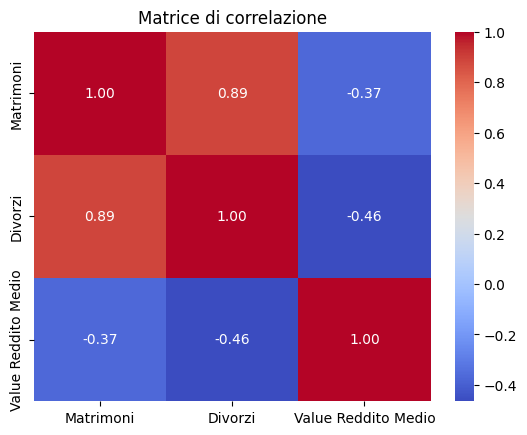

In [210]:
new_reddito_df = reddito_df.loc[:, ["TIME", "Value"]].groupby(by="TIME").sum().rename(columns={"Value": "Value Reddito Medio"})
new_df = matrimoni_divorzi_df.merge(new_reddito_df, left_on="TIME", right_on="TIME", how="inner")
new_df["Matrimoni"] = new_df["Value Matrimoni Civili"]+new_df["Value Matrimoni Religiosi"]
new_df["Divorzi"] = new_df["Value Divorzi Religiosi"]+new_df["Value Divorzi Civili"]

correlation_data = new_df[['Matrimoni', 'Divorzi','Value Reddito Medio']]
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice di correlazione")

In [13]:
from sklearn.preprocessing import MinMaxScaler
matrimoni_divorzi_df = matrimoni_divorzi_df.interpolate()
print(matrimoni_divorzi_df.columns) #Seleziona periodo_x_x, Value_x_y,Value_y_y,Value_x_x ,Value_y_x
matrimoni_divorzi_df = matrimoni_divorzi_df[["TIME", "Value Divorzi Religiosi","Value Divorzi Civili","Value Matrimoni Civili" ,"Value Matrimoni Religiosi"]]

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(matrimoni_divorzi_df), columns=matrimoni_divorzi_df.columns)

Index(['TIME', 'Value Matrimoni Civili', 'Value Matrimoni Religiosi',
       'Value Divorzi Civili', 'Value Divorzi Religiosi'],
      dtype='object')


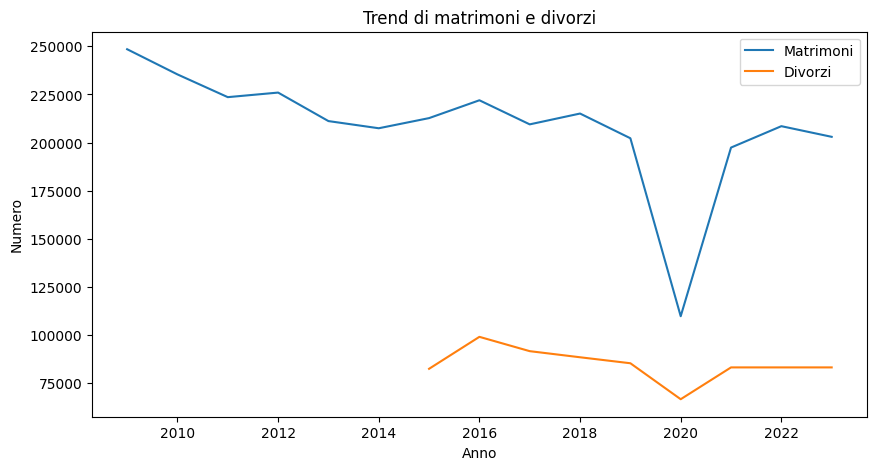

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(matrimoni_divorzi_df['TIME'], matrimoni_divorzi_df['Value Matrimoni Religiosi']+matrimoni_divorzi_df['Value Matrimoni Civili'], label='Matrimoni')
plt.plot(matrimoni_divorzi_df['TIME'], matrimoni_divorzi_df['Value Divorzi Religiosi'] + matrimoni_divorzi_df['Value Divorzi Civili'], label='Divorzi')
plt.legend()
plt.title("Trend di matrimoni e divorzi")
plt.xlabel("Anno")
plt.ylabel("Numero")
plt.show()

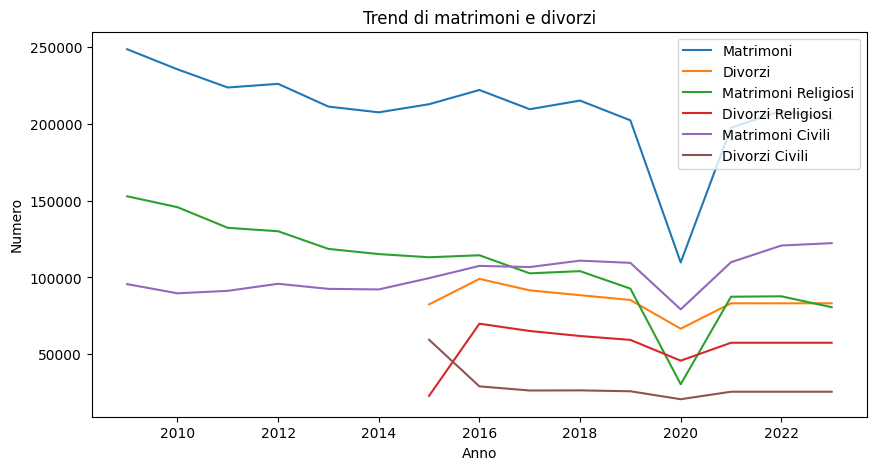

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(matrimoni_divorzi_df['TIME'], matrimoni_divorzi_df['Value Matrimoni Religiosi'], label='Matrimoni Religiosi')
plt.plot(matrimoni_divorzi_df['TIME'], matrimoni_divorzi_df['Value Divorzi Religiosi'], label='Divorzi Religiosi')
plt.plot(matrimoni_divorzi_df['TIME'], matrimoni_divorzi_df['Value Matrimoni Civili'], label='Matrimoni Civili')
plt.plot(matrimoni_divorzi_df['TIME'], matrimoni_divorzi_df['Value Divorzi Civili'], label='Divorzi Civili')
plt.legend()
plt.title("Trend di matrimoni e divorzi")
plt.xlabel("Anno")
plt.ylabel("Numero")
plt.show()

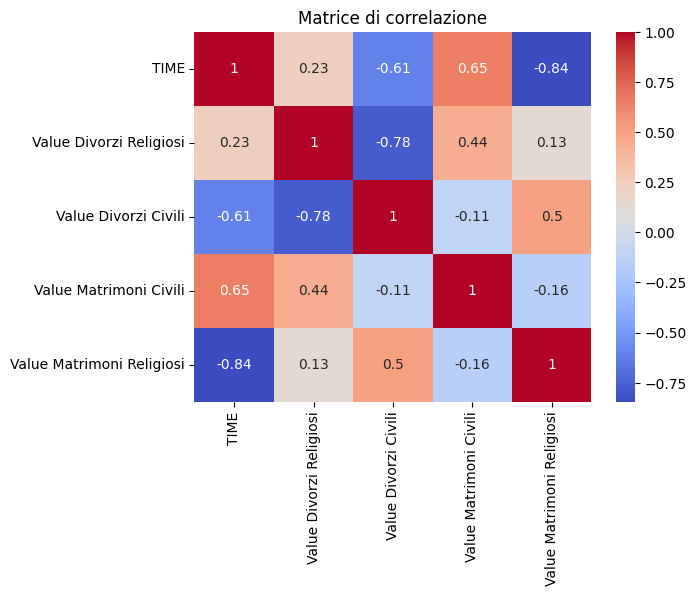

In [15]:
sns.heatmap(matrimoni_divorzi_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice di correlazione")
plt.show()

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Usa solo la colonna dei valori
series = matrimoni_divorzi_df['Value Matrimoni Religiosi']

# Configura il modello ARIMA (esempio: ordine (1, 1, 0))
model = ARIMA(series, order=(1, 1, 0))
model_fit = model.fit()

# Mostra il sommario del modello
print(model_fit.summary())

                                   SARIMAX Results                                   
Dep. Variable:     Value Matrimoni Religiosi   No. Observations:                   15
Model:                        ARIMA(1, 1, 0)   Log Likelihood                -160.430
Date:                       Mon, 20 Jan 2025   AIC                            324.861
Time:                               20:48:42   BIC                            326.139
Sample:                                    0   HQIC                           324.743
                                        - 15                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1212      0.145     -0.835      0.404      -0.406       0.163
sigma2      5.266e+08   4.51e-11   1.17e+19      0.000    5.27e+08    5.27e

In [17]:
forecast = model_fit.forecast(steps=3)
print("Previsioni:", forecast)

# Aggiungi le previsioni alla tabella
future_years = [2024, 2025, 2026]
forecast_df = pd.DataFrame({'anno': future_years, 'valore_predetto': forecast})
print(forecast_df)

Previsioni: 15    81506.624545
16    81402.458439
17    81415.080900
Name: predicted_mean, dtype: float64
    anno  valore_predetto
15  2024     81506.624545
16  2025     81402.458439
17  2026     81415.080900


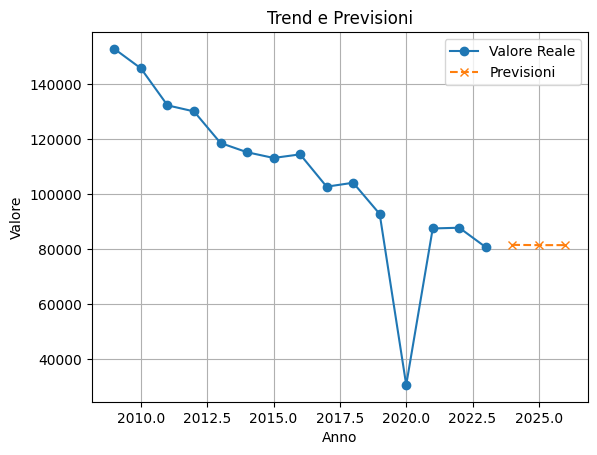

In [18]:
plt.plot(matrimoni_divorzi_df['TIME'], matrimoni_divorzi_df['Value Matrimoni Religiosi'], marker='o', label='Valore Reale')
plt.plot(future_years, forecast, marker='x', linestyle='--', label='Previsioni')
plt.title("Trend e Previsioni")
plt.xlabel("Anno")
plt.ylabel("Valore")
plt.grid()
plt.legend()
plt.show()

In [81]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Trasforma 'anno' in variabile numerica
X = matrimoni_divorzi_df['TIME'].values.reshape(-1, 1)  # Variabile indipendente
yMR = matrimoni_divorzi_df['Value Matrimoni Religiosi'].values  # Variabile dipendente
yMC = matrimoni_divorzi_df['Value Matrimoni Civili'].values  # Variabile dipendente
yDR = matrimoni_divorzi_df.dropna()
X1  = yDR["TIME"].values.reshape(-1, 1)
yDR = yDR['Value Divorzi Religiosi'].values  # Variabile dipendente
yDC = matrimoni_divorzi_df.dropna()
X2  = yDC["TIME"].values.reshape(-1, 1)
yDC = yDC['Value Divorzi Civili'].dropna().values  # Variabile dipendente


# Crea e addestra il modello
model1 = LinearRegression()
model1.fit(X, yMR)
model2 = LinearRegression()
model2.fit(X, yMC)
model3 = LinearRegression()
model3.fit(X1, yDR)
model4 = LinearRegression()
model4.fit(X2, yDC)

# Coefficiente angolare e intercetta
print("Coefficiente angolare (m):", model1.coef_[0])
print("Intercetta (b):", model1.intercept_)

Coefficiente angolare (m): -5662.460714285714
Intercetta (b): 11522735.266666666


In [235]:
future_years = np.array([2024, 2025, 2026]).reshape(-1, 1)
predictions1 = model1.predict(future_years) #Matrimoni Religiosi
print("Previsioni (2023-2025):", predictions1)
predictions2 = model2.predict(future_years) #Matrimoni Civili
print("Previsioni (2023-2025):", predictions2)
predictions3 = model3.predict(future_years) #Divorzi Religiosi
print("Previsioni (2023-2025):", predictions3)
predictions4 = model4.predict(future_years) #Divorzi Civili
print("Previsioni (2023-2025):", predictions4)

Previsioni (2023-2025): [61914.78095238 56252.32023809 50589.85952381]
Previsioni (2023-2025): [115739.80952381 117508.05238095 119276.2952381 ]
Previsioni (2023-2025): [61119.25       62280.23333333 63441.21666667]
Previsioni (2023-2025): [16731.05555556 14179.82222222 11628.58888889]


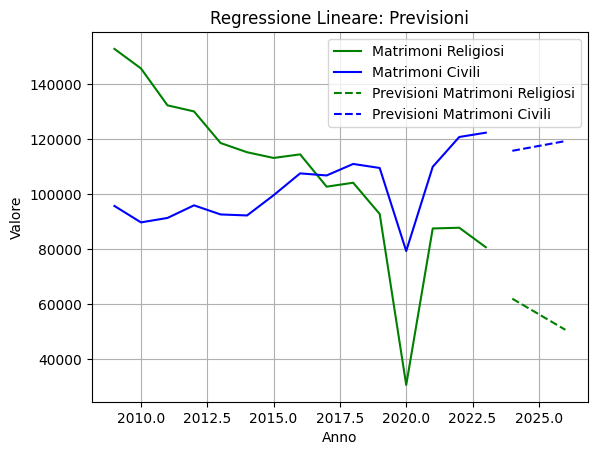

In [236]:
plt.plot(matrimoni_divorzi_df['TIME'], matrimoni_divorzi_df['Value Matrimoni Religiosi'], color='green', label='Matrimoni Religiosi')
plt.plot(matrimoni_divorzi_df['TIME'], matrimoni_divorzi_df['Value Matrimoni Civili'], color='blue', label='Matrimoni Civili')
plt.plot(future_years, predictions1, color='green', linestyle='--', label='Previsioni Matrimoni Religiosi')
plt.plot(future_years, predictions2, color='blue', linestyle='--', label='Previsioni Matrimoni Civili')
plt.title("Regressione Lineare: Previsioni")
plt.xlabel("Anno")
plt.ylabel("Valore")
plt.legend()
plt.grid()
plt.show()

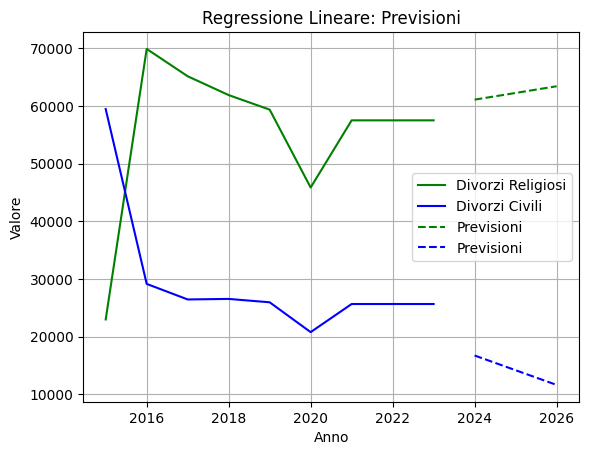

In [237]:
plt.plot(matrimoni_divorzi_df['TIME'], matrimoni_divorzi_df['Value Divorzi Religiosi'], color='green', label='Divorzi Religiosi')
plt.plot(matrimoni_divorzi_df['TIME'], matrimoni_divorzi_df['Value Divorzi Civili'], color='blue', label='Divorzi Civili')
plt.plot(future_years, predictions3, color='green', linestyle='--', label='Previsioni')
plt.plot(future_years, predictions4, color='blue', linestyle='--', label='Previsioni')
plt.title("Regressione Lineare: Previsioni")
plt.xlabel("Anno")
plt.ylabel("Valore")
plt.legend()
plt.grid()
plt.show()

In attesa

In [82]:
#del(appoggio_df_religioso, appoggio_df_civile)
#appoggio_df_religioso = df_religioso
#appoggio_df_civile = df_civile
#for Territorio in appoggio_df_civile["Territorio"]:
#    appoggio_df_religioso.loc[appoggio_df_religioso["Territorio"]==Territorio, ["Value"]].plot(color="red", label=f"Matrimonio Religioso {Territorio}", legend=True)
#    appoggio_df_civile.loc[appoggio_df_civile["Territorio"]==Territorio, ["Value"]].plot(color="blue", label=f"Matrimonio civile {Territorio}",legend=True)

Differenza negli anni delle nascite e delle morti

In [26]:
nati_url = r".\File\DCIS_NATI2_Totale.csv"
nati_df = pd.read_csv(nati_url)

decessi_url = r".\File\DCIS_DECESSI_Totale.csv"
decessi_df = pd.read_csv(decessi_url)

In [27]:
new_nati_df= nati_df.rename(columns={"Value": "Nascite"})
new_decessi_df= decessi_df.rename(columns={"Value": "Decessi"})

<Axes: xlabel='TIME'>

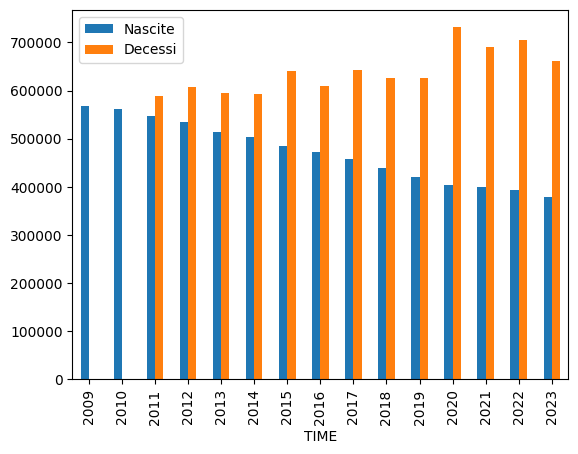

In [28]:
new_nati_df = new_nati_df.loc[new_nati_df["Tipo dato"] == "nati vivi", ["TIME", "Nascite"]].groupby(by="TIME").sum()
new_decessi_df = new_decessi_df.loc[new_decessi_df["Sesso"]=="totale", ["TIME", "Decessi"]].groupby(by="TIME").sum()

df = new_decessi_df.merge(new_nati_df, left_on="TIME", right_on="TIME", how="outer").reset_index()
df.plot(x="TIME", y=["Nascite", "Decessi"], kind="bar")

Verificare se c'è una maggiore mortalità maschile o femminile

<Axes: title={'center': 'Morti'}, xlabel='TIME'>

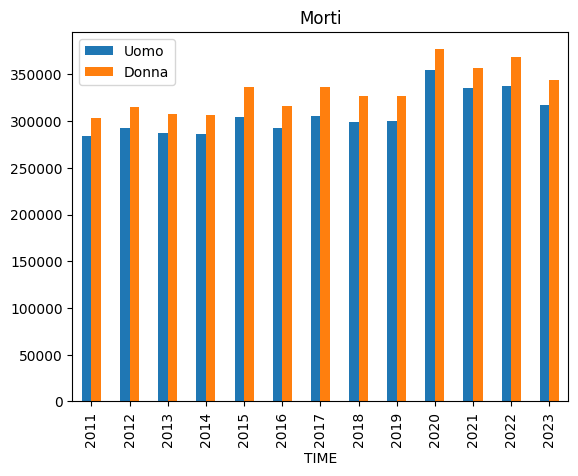

In [29]:

decessi_uomini_df = decessi_df.loc[decessi_df["Sesso"]=="maschi", ["TIME", "Value"]].groupby(by="TIME").sum()
decessi_uomini_df= decessi_uomini_df.rename(columns={"Value": "Uomo"})

decessi_donne_df = decessi_df.loc[decessi_df["Sesso"]=="femmine", ["TIME", "Value"]].groupby(by="TIME").sum()
decessi_donne_df= decessi_donne_df.rename(columns={"Value": "Donna"})


df = decessi_uomini_df.merge(decessi_donne_df, left_on="TIME", right_on="TIME", how="outer").reset_index()
df.plot(x="TIME", y=["Uomo", "Donna"], kind="bar", title="Morti")

verificare se c'è una maggiore natalità maschile o femminile

<Axes: title={'center': 'Nascite'}, xlabel='TIME'>

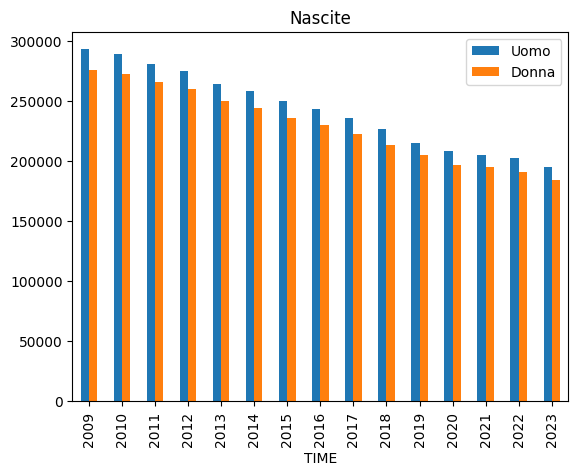

In [30]:
nati_uomini_df = nati_df.loc[nati_df["Tipo dato"]=="nati vivi maschi", ["TIME", "Value"]].groupby(by="TIME").sum()
nati_uomini_df= nati_uomini_df.rename(columns={"Value": "Uomo"})

nati_donne_df = nati_df.loc[nati_df["Tipo dato"]=="nati vive femmine", ["TIME", "Value"]].groupby(by="TIME").sum()
nati_donne_df= nati_donne_df.rename(columns={"Value": "Donna"})


df1 = nati_uomini_df.merge(nati_donne_df, left_on="TIME", right_on="TIME", how="outer").reset_index()
df1.plot(x="TIME", y=["Uomo", "Donna"], kind="bar", title="Nascite")

Text(0.5, 1.0, 'Correlation Heatmap')

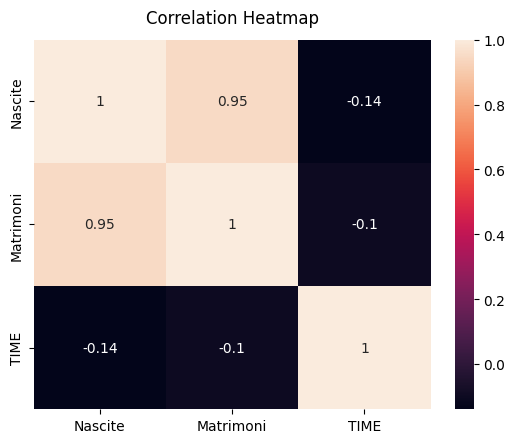

In [35]:
matrimoni_url = r".\File\DCIS_MATRDEMO_14012025210031352.csv"

matrimoni_df = pd.read_csv(matrimoni_url)

matrimoni_df = matrimoni_df.loc[matrimoni_df["RITO1"]== "ALL", :]
nati_url = r".\File\DCIS_NATI2_totale.csv"


nati_df = pd.read_csv(nati_url)
nati_df = nati_df.loc[nati_df["Tipo dato"]== "nati vivi", :]



nati_df= nati_df.rename(columns={"Value": "Nascite"})
matrimoni_df= matrimoni_df.rename(columns={"Value": "Matrimoni"})

df = matrimoni_df.merge(nati_df, left_on=["TIME","Territorio"], right_on=["TIME","Territorio"], how = "inner")

df = df.loc[:, ["Nascite", "Matrimoni", "TIME"]]

df = df.corr().round(2)
df["TIME"].sort_values(ascending=False)

heatmap = sns.heatmap(df, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)



###############################################
Non so se costruirci qualcosa sopra

In [53]:
url = r".\File\DCIS_CMORTE1_EV_19012025002204039.csv"
new_df= pd.read_csv(url)
new_df.columns

Index(['ITTER107', 'Territorio', 'TIPO_DATO15', 'Tipo dato', 'ETA1_A', 'Età',
       'SEXISTAT1', 'Sesso', 'CAUSEMORTE_SL',
       'Causa iniziale di morte - European Short List', 'TIME',
       'Seleziona periodo', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

<Axes: xlabel='TIME'>

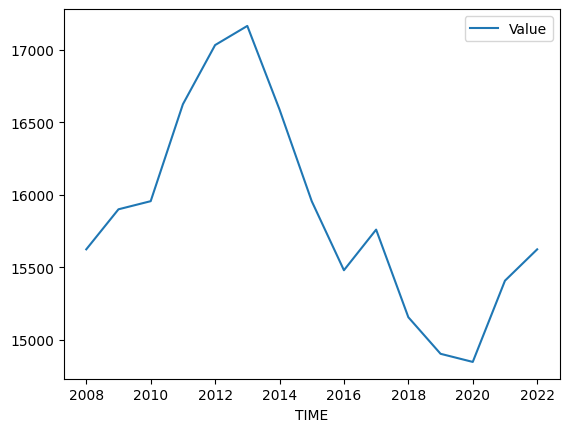

In [68]:
new_new_df = new_df.loc[new_df["Causa iniziale di morte - European Short List"]== "suicidio e autolesione intenzionale",  ["TIME", "Value", "Età"]]
new_new_df.loc[new_df["Età"]== "totale",  ["TIME", "Value"]].groupby(by="TIME").sum().plot()


In [94]:
new_new_df = new_df.loc[new_df["Causa iniziale di morte - European Short List"]== "suicidio e autolesione intenzionale",  ["TIME","Value", "Età"]]
print(new_new_df.head())
new_new_df.loc[new_new_df["TIME"]== "2023",  ["Value", "Età"]]
new_new_df["Età"] = pd.Series([new_new_df["Età"]])
for element in new_new_df["Età"]:
    print(element)
    #element.replace(" anni","")
    
print(new_new_df.head())
#.sum().plot(x="Età", y=["Value"], kind = "bar")



       TIME  Value       Età
12943  2009      1  5-9 anni
12944  2013      1  5-9 anni
12945  2021      1  5-9 anni
12946  2009      1  5-9 anni
12947  2010      1  5-9 anni
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
na